In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import numpy as np

In [11]:
print(os.getcwd())

C:\Users\Mimy\OneDrive\Desktop\data_visualization


In [13]:
# Study data files
mouse_metadata_path = r'C:\Users\Mimy\OneDrive\Desktop\data_visualization\Pymaceuticals\data\Mouse_metadata.csv'
study_results_path = r'C:\Users\Mimy\OneDrive\Desktop\data_visualization\Pymaceuticals\data\Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




# Exploring and checking data that given

In [247]:
# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [245]:
# Display the data table for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [46]:
# check the size
df_combined.shape

(1893, 8)

In [15]:
# Combining the data into a single DataFrame
df_combined = pd.merge(study_results,mouse_metadata,how ='left',on = 'Mouse ID')
df_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [17]:
# Displaying the data type for preview
df_combined.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [19]:
# Checking the number of mice.
total_mince = df_combined['Mouse ID'].nunique()
total_mince

249

In [169]:
# Check for duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicates = df_combined[df_combined.duplicated(['Mouse ID', 'Timepoint'])]

# mouse ID that has a duplicate
mouse_id_duplicate = duplicates['Mouse ID'].unique()
# Display the duplicate rows
mouse_id_duplicate


array(['g989'], dtype=object)

In [61]:
# Retrieve all data for the duplicate 'Mouse ID'
all_duplicate_data = df_combined[df_combined['Mouse ID'].isin(mouse_id_duplicate)]

#Display the result
all_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = df_combined[~df_combined['Mouse ID'].isin(mouse_id_duplicate)]
df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [103]:
# Checking the number of mice in the clean DataFrame.
total_mousse_after_cleaning = df_cleaned['Mouse ID'].nunique()
total_mousse_after_cleaning

248

# Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.


drug_regimen_mean = df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_regimen_meadian= df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_regimen_variance= df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_regimen_stdv= df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_regimen_sem= df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_tumor_4_regimen = pd.DataFrame({'Mean Tumor Volume':drug_regimen_mean,
                        'Median Tumor Volume':drug_regimen_meadian,
                        'Tumor Volume Variance':drug_regimen_variance,
                        'Tumor Volume Std. Dev.':drug_regimen_stdv,
                        'Tumor Volume Std. Err.':drug_regimen_sem
    
})



#displaying summary
summary_tumor_4_regimen 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [178]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_method_summary = df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({'mean','median', 'var', 'std', 'sem'})

aggregation_method_summary

,sem,std,median,mean,var
Drug Regimen,,,,,
Capomulin,0.329346,4.994774,41.557809,40.675741,24.947764
Ceftamin,0.469821,6.268188,51.776157,52.591172,39.290177
Infubinol,0.492236,6.567243,51.820584,52.884795,43.128684
Ketapril,0.603860,8.279709,53.698743,55.235638,68.553577
Naftisol,0.596466,8.134708,52.509285,54.331565,66.173479
Placebo,0.581331,7.821003,52.288934,54.033581,61.168083
Propriva,0.544332,6.622085,50.446266,52.320930,43.852013
Ramicane,0.320955,4.846308,40.673236,40.216745,23.486704
Stelasyn,0.573111,7.710419,52.431737,54.233149,59.450562


# Bar and Pie Charts

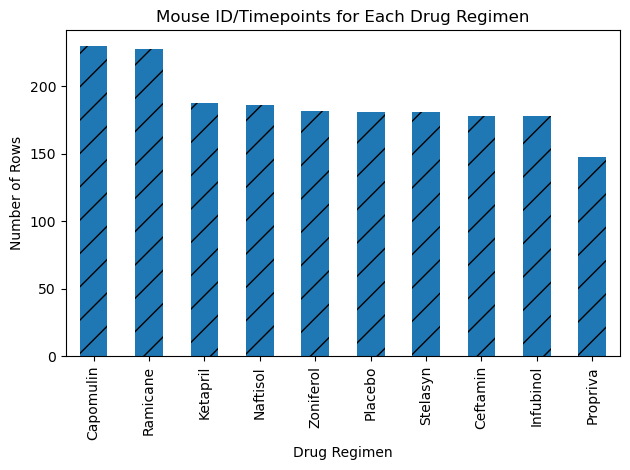

In [214]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = df_cleaned.groupby('Drug Regimen').size().sort_values(ascending = False)

# Create a bar plot 

bars = regimen_counts.plot(kind='bar')
# Set hatching for each bar 
for bar in bars.patches:
    bar.set_hatch('/')

# Set the title and labels
plt.title('Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the bar plot
plt.tight_layout()
plt.show()

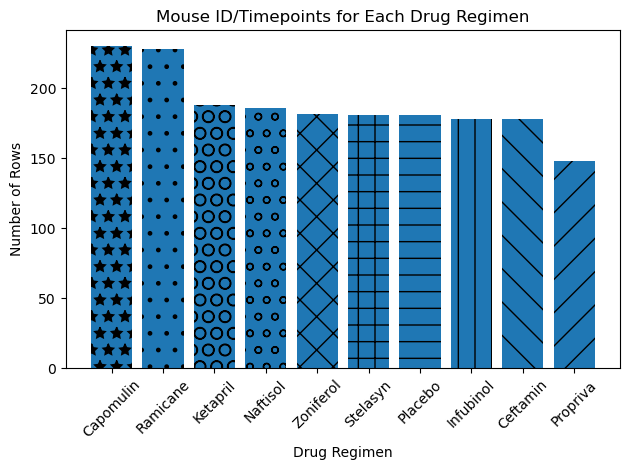

In [236]:
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = df_cleaned['Drug Regimen'].value_counts()

# Generate the bar plot using pyplot
#plt.figure(figsize=(10, 6))
bars = plt.bar(regimen_counts.index, regimen_counts.values)
# Set hatching for each bar
patterns =  ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar in bars.patches:
    bar.set_hatch(patterns.pop())
# Set title and labels
plt.title('Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation= 45)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

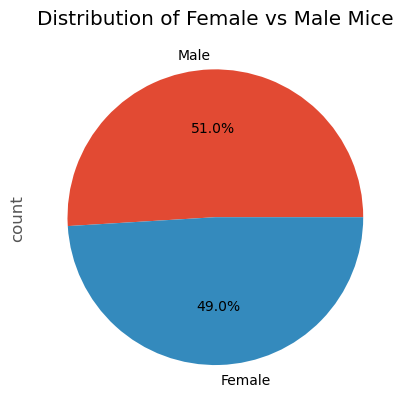

In [127]:
#First Pie Chart with Pandas DataFrame.plot() method of female versus male mice
counts = df_cleaned['Sex'].value_counts()
plt.style.use('ggplot')
counts.plot(kind="pie",autopct='%.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.show()

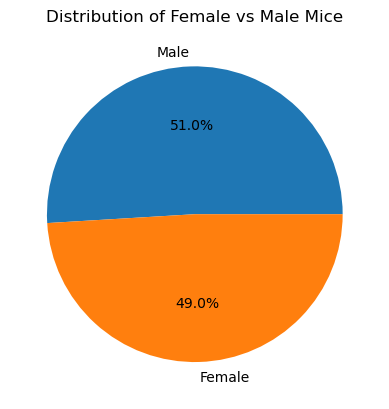

In [241]:
# Pie Chart with Matplotlib's pyplot methods method of female versus male mice
plt.figure()
plt.style.use('default')
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.show()

In [255]:
# Group by 'Mouse ID' and find the maximum 'Timepoint'
greatest_timepoints = df_cleaned.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge the result with the cleaned DataFrame
merge_greatest_cleaned = greatest_timepoints.merge(df_cleaned, how='left', on=['Mouse ID', 'Timepoint'])

# Display the merged result
merge_greatest_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [137]:
treatement_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
empty_list = []
#Looping through each drug in the treatment list
for drug in treatement_names:
    # locating the rows in the merged DataFrame that correspond to each treatment
    final_tumor_volumes = merge_greatest_cleaned[merge_greatest_cleaned["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    # add subset 
    empty_list.append(final_tumor_volumes)
    
    # Determine outliers using quartiles
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #outliers by using the lower
    lower_bound = lowerq - (1.5*iqr)
    #outliers by using the upper
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    #printing result
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


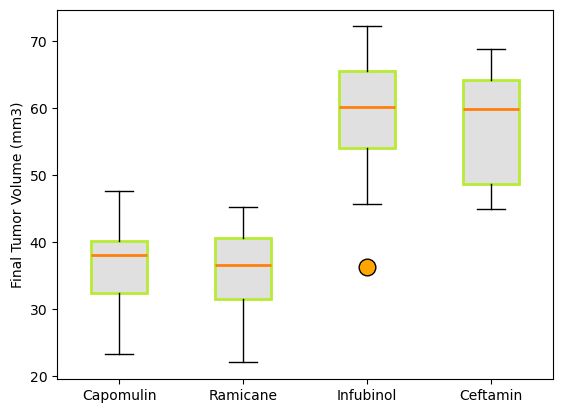

In [163]:
# generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group
mark_outlier = dict(markerfacecolor='Orange',markersize=12)
boxes = plt.boxplot(empty_list, labels = treatement_names, flierprops=mark_outlier, patch_artist=True,medianprops = {'linewidth':2})
for box in boxes['boxes']:
    #set edge color
    box.set(color ='#b7eb34', linewidth = 2)
  # change fill color
    box.set(facecolor='#e0e0e0')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

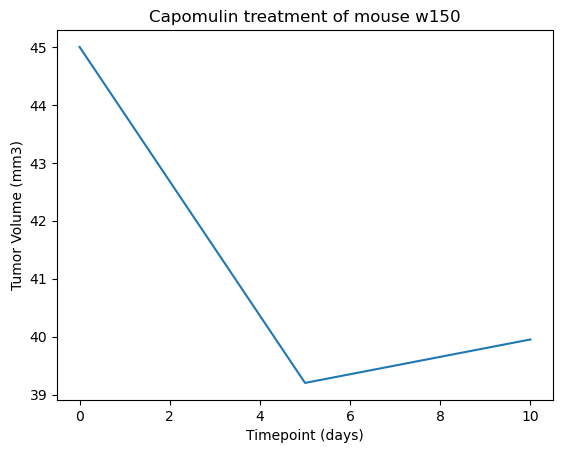

In [155]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = df_cleaned.loc[df_cleaned['Drug Regimen'] == "Capomulin"]
#single mouse treated with Capomulin
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'w150']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse w150')
plt.show()

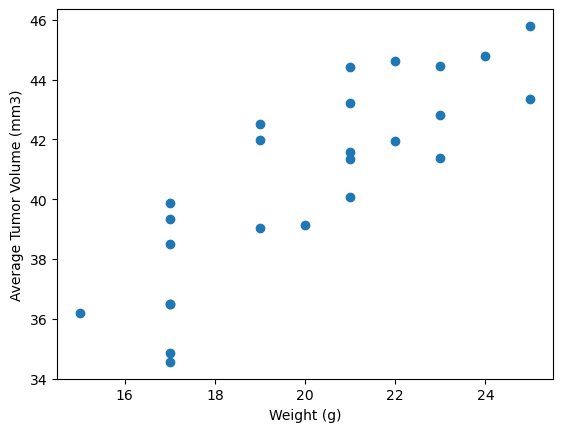

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = df_cleaned[df_cleaned['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


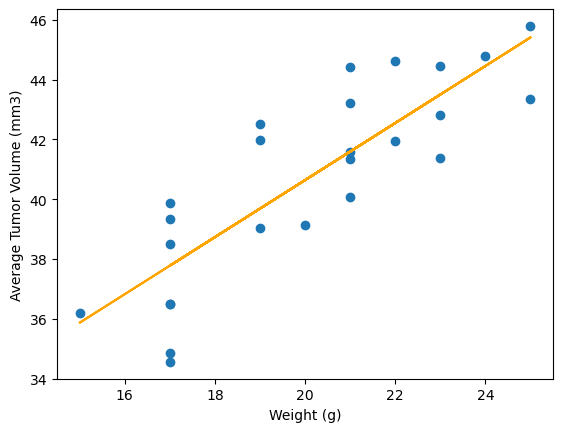

In [239]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="Orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()